In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as curce_fit
import pandas as pd

def degtorad(deg):
    return(deg/180*np.pi)

In [51]:
#Als erstes mal die Linearität der Fotodiode Prüfen
data=pd.read_table("Data/Polarisation.txt",skiprows=2)
data

,winkel,intens
0,0,102.4
1,5,100.5
2,10,98.7
3,15,94.8
4,20,88.5
5,25,84.2
6,30,75.4
7,35,67.4
8,40,58.5
9,45,48.5


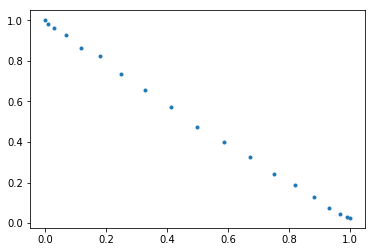

In [52]:
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
intens=intens/np.max(intens)
fig,ax=plt.subplots()
ax.plot(np.sin(degtorad(angle))**2,intens,".")

In [65]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)
def linearfit(linf,x,y,m,b,ymin,ymax):

    tempx=[]
    tempy=[]
    #hier werden die Daten ausgewählt die im richtigen y interval sind
    for i in range(len(y)):
        if(ymin<y[i] and y[i]<ymax):
            tempx.append(x[i])
            tempy.append(y[i])
    popt,pcov=curce_fit(linf,tempx,tempy,p0=(m,b))
    return popt,pcov,tempx,tempy

No handles with labels found to put in legend.


<class 'pandas.core.frame.DataFrame'>


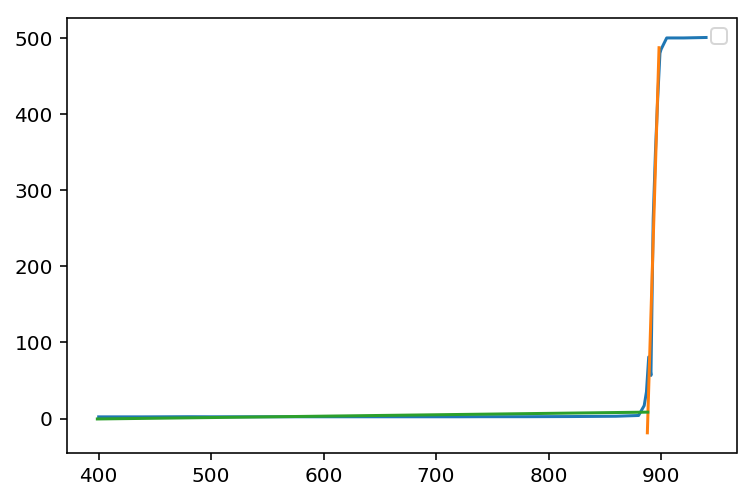

In [72]:

data=[]
data.append( pd.read_csv("Data/{}.txt".format("Links"),delimiter="\t",skiprows=1 ))
print(type(data[0]))
wavelen, intens =[],[]
for entry in data:
    wavelen= entry.values[:,0]
    intens = entry.values[:,1]
    

wavelen=np.array(wavelen)

#Als erstes nur die interessanten werte betrachten, also ab 950nm cutten
relwavelen=[]
for x in wavelen:
    if(x<950):
        relwavelen.append(x)
relintens=intens[0:len(relwavelen)]

fig, ax = plt.subplots(dpi=144)

#Data plot
ax.plot(relwavelen,relintens)

#Fit Steigung
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,40,450)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))

#Fit Gerade
#Fit
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,0,40)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))





#ax.plot(xdata,expon(xdata,*popt), label="Test: \n A={o[0]:.2f}$\pm${e[0]:.2f} \n $E_g$={o[1]:.2f}$\pm${e[1]:.2f}".format(o=popt,e=perr))
#ax.plot(xdata, heavi(xdata,*popt), label="Heaviside Fit: \n A={o[0]:.2f}$\pm${e[0]:.2f} \n b={o[1]:.2f}$\pm${e[1]:.2f} \n c={o[2]:.2f}$\pm${e[2]:.2f}".format(o=popt,e=perr))
ax.legend();